# Regressão Linear Simples - Trabalho   


__Equipe:__
* Sayonara Santos Araújo
* Lailson Azevedo do Rego


## Estudo de caso: Seguro de automóvel sueco

Agora, sabemos como implementar um modelo de regressão linear simples. Vamos aplicá-lo ao conjunto de dados do seguro de automóveis sueco. Esta seção assume que você baixou o conjunto de dados para o arquivo insurance.csv, o qual está disponível no notebook respectivo.

O conjunto de dados envolve a previsão do pagamento total de todas as reclamações em milhares de Kronor sueco, dado o número total de reclamações. É um dataset composto por 63 observações com 1 variável de entrada e 1 variável de saída. Os nomes das variáveis são os seguintes:

1. Número de reivindicações.
2. Pagamento total para todas as reclamações em milhares de Kronor sueco.

Voce deve adicionar algumas funções acessórias à regressão linear simples. Especificamente, uma função para carregar o arquivo CSV chamado *load_csv ()*, uma função para converter um conjunto de dados carregado para números chamado *str_column_to_float ()*, uma função para avaliar um algoritmo usando um conjunto de treino e teste chamado *split_train_split ()*, a função para calcular RMSE chamado *rmse_metric ()* e uma função para avaliar um algoritmo chamado *evaluate_algorithm()*.

Utilize um conjunto de dados de treinamento de 60% dos dados para preparar o modelo. As previsões devem ser feitas nos restantes 40%. 

Compare a performabce do seu algoritmo com o algoritmo baseline, o qual utiliza a média dos pagamentos realizados para realizar a predição ( a média é 72,251 mil Kronor).


## Resolução

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from math import sqrt
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
class Prediction(object):
    def __init__(self):
        self.x_column = None
        self.y_column = None

    #Dados iniciais (Para deixar todas as funções genéricas)    
    def column_name(self, x_column_name, y_column_name):
        self.x_column = x_column_name
        self.y_column = y_column_name

    #Função para carregar o arquivo CSV
    def load_csv(self, name_dataset):
        return pd.read_csv(name_dataset, names=[self.x_column, self.y_column])

    #Função para converter um conjunto de dados carregado para números
    def str_column_to_float(self, dataset):
        columns = [self.x_column, self.y_column]
        for column in columns:
            dataset[column] = dataset[column].astype(float)
    
    #Função para separar o dataset em um conjunto de treino e teste
    def split_train_split(self, dataset, porcentage_test):
        y = dataset[self.y_column].values
        X = dataset[self.x_column].values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=porcentage_test)
        return X_train, X_test, y_train, y_test
    
    #Calcula a média de uma coluna
    def mean(self, values):
        return sum(values) / float(len(values))
        
    #Calcula a variância de uma coluna
    def variance(self, values, mean):
        return sum([(x-mean)**2 for x in values])
    
    #Calcula a covariância entre x e y
    def covariance(self, x, mean_x, y, mean_y):
        covar = 0.0
        for i in range(len(x)):
            covar += (x[i] - mean_x) * (y[i] - mean_y)
        return covar

    #Calcula os coeficientes
    def coefficients(self, X_train, y_train):
        x_mean = self.mean(X_train)
        y_mean = self.mean(y_train)
        b1 = self.covariance(X_train, x_mean, y_train, y_mean) / self.variance(X_train, x_mean)
        b0 = y_mean - b1 * x_mean
        return b0, b1
    
    def linear_regression(self, X_train, y_train, X_test):
        prediction = list()
        b0, b1 = self.coefficients(X_train, y_train)
        for i in range(len(X_test)):
            y_predicted = b0 + b1*X_test[i]
            prediction.append(y_predicted)
        return prediction
    
    def base_line(self, X_train, y_train, X_test): #(?)
        y_mean = self.mean(y_train)
        prediction = [y_mean]*len(X_test)
        return prediction
    
    #Função para calcular RMSE
    def rmse_metric(self, actual, predicted):
        sum_error = 0.0
        for i in range(len(actual)):
            prediction_error = predicted[i] - actual[i]
            sum_error += (prediction_error ** 2)
        mean_error = sum_error / float(len(actual))
        return sqrt(mean_error)

    #Função para avaliar um algoritmo
    def evaluate_algorithm(self, X_train, y_train, X_test, y_test, algorithm):
        predicted = algorithm(X_train, y_train, X_test)
        rmse = self.rmse_metric(y_test, predicted)
        return rmse, predicted

In [3]:
p = Prediction()
p.column_name('claims','payment')
dataset = p.load_csv('insurance.csv')
p.str_column_to_float(dataset)
X_train, X_test, y_train, y_test = p.split_train_split(dataset, 0.4)

In [4]:
dataset

,claims,payment
0,108.0,392.5
1,19.0,46.2
2,13.0,15.7
3,124.0,422.2
4,40.0,119.4
5,57.0,170.9
6,23.0,56.9
7,14.0,77.5
8,45.0,214.0
9,10.0,65.3


### Avaliação do algoritmo de Regressão Linear

In [5]:
error_rl, prediction_rl = p.evaluate_algorithm(X_train, y_train, X_test, y_test, p.linear_regression)

Erro quadrático: 33.76


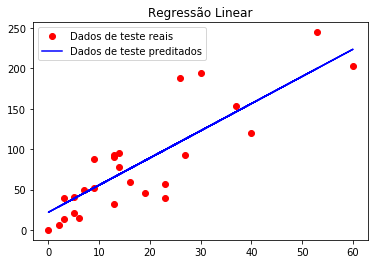

In [6]:
red_dot, = plt.plot(X_test, y_test, 'ro')
blue_dot, = plt.plot(X_test, prediction_rl, 'b-')
plt.legend([red_dot, blue_dot], ["Dados de teste reais", "Dados de teste preditados"])
plt.title("Regressão Linear")
print('Erro quadrático: {0:.2f}'.format(error_rl))

### Avaliação do algoritmo de Base Line

In [7]:
error_bl, prediction_bl = p.evaluate_algorithm(X_train, y_train, X_test, y_test, p.base_line)

Erro quadrático: 71.09


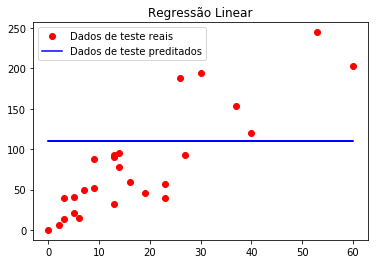

In [8]:
red_dot, = plt.plot(X_test, y_test, 'ro')
blue_dot, = plt.plot(X_test, prediction_bl, 'b-')
plt.legend([red_dot, blue_dot], ["Dados de teste reais", "Dados de teste preditados"])
plt.title("Regressão Linear")
print('Erro quadrático: {0:.2f}'.format(error_bl))